In [1]:
%matplotlib notebook

In addition to the preference index, these Ethograms give an impressive visual overview of just how much the flies are avoiding bitter sensation!

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches
from pathlib import Path

In [3]:
home_path = os.getcwd()
data_path = Path(home_path, 'data/Gr66a-Gal4xUAS-Chrimson/')
data_path_ctr = Path(home_path, 'data/empty-Gal4xUAS-Chrimson/')
# all the figures will be saved in this folder
target_path = Path(home_path, 'plots/')
Path(target_path).mkdir(parents=True, exist_ok=True) 

In [4]:
def own_red_colormap():
    """
    Colormap for the checkerboard arena in the background
    
    Originally I modified the 'Reds' colormap. The problem was that at value 0 it was still a bit red and 
    not white.
    I'm using the starting values Reds for the green and blue channel. 
    The red channels stays always on one.
    Finally, the inverted(!) array is passed to LinearSegmentedColormap to create the cmap object
    to be used for plotting
    """
    own_colors = np.zeros((120,4))
    own_colors[:,0] = 1 # red channel
    own_colors[:,1] = np.linspace(0.41279508, 1, own_colors.shape[0]) # green channel
    own_colors[:,2] = np.linspace(0.28835063, 1, own_colors.shape[0]) # blue channel
    own_colors[:,3] = 1
    
    own_colormap = LinearSegmentedColormap.from_list('Lower Half', own_colors[::-1,:])
    
    return(own_colormap)

own_red_cmap = own_red_colormap()

In [13]:
# Collecting the Experimental Data

folders = [x for x in data_path.iterdir() if x.is_dir()]
preference_index_gr66a = []
for i, folder_name in enumerate(folders):
    print('Analyzing ' + folder_name.parts[-1])
    
    files = [x for x in folder_name.iterdir() if x.is_file()]
    # find the data_file.csv to get the distance to source of the centroid
    for file in files:
        if 'data.csv' in file.parts[-1]:
            data = pd.read_csv(file)
    
    if i == 0:
        stimulation = np.zeros((data.shape[0], len(folders)))
        preference_index_over_time_Gr66a=np.zeros((data.shape[0], len(folders)))
        
    stimulation[:,i] = data['stimulation']
    
    # preference index is essentially stimulation - 1 means light was on, 0 means light was off
    preference_index_over_time_Gr66a[np.where(stimulation[:,i] < 40000),i] = 1

Analyzing 04.10.2018_16-24-49_Gr66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-37-40_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-49-15_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_16-55-45_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-01-14_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-06-46_GR66a-Gal4xUAS-Chrimson


C:\Users\David\AppData\Local\conda\conda\envs\pivr_publication\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


Analyzing 04.10.2018_17-17-45_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-27-23_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-37-11_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-45-34_GR66a-Gal4xUAS-Chrimson
Analyzing 04.10.2018_17-51-10_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-12-31_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-29-42_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-38-38_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_13-57-46_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-04-53_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-10-45_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-16-15_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-25-58_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-31-17_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-38-09_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-43-53_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-49-42_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_14-55-47_GR66a-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-01-5

In [26]:
# Collect the empty-Gal4 (control) data
folders = [x for x in data_path_ctr.iterdir() if x.is_dir()]
for i, folder_name in enumerate(folders):
    print('Analyzing ' + folder_name.parts[-1])
    
    files = [x for x in folder_name.iterdir() if x.is_file()]
    # find the data_file.csv to get the distance to source of the centroid
    for file in files:
        if 'data.csv' in  file.parts[-1]:
            data = pd.read_csv(file)
    
    if i == 0:
        stimulation = np.zeros((data.shape[0], len(folders)))
        preference_index_over_time_empty=np.zeros((data.shape[0], len(folders)))
        
    stimulation[:,i] = data['stimulation']
    
    # preference index is essentially stimulation - 1 means light was on, 0 means light was off
    preference_index_over_time_empty[np.where(stimulation[:,i] < 40000),i] = 1

Analyzing 04.10.2018_14-20-29_empty-Gal4xUAS-Chrimson


C:\Users\David\AppData\Local\conda\conda\envs\pivr_publication\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


Analyzing 04.10.2018_14-30-14_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_14-50-03_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_14-55-36_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-03-24_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-10-31_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-17-57_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-30-41_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-36-18_empty-Gal4xUAS-Chrimson
Analyzing 04.10.2018_15-54-05_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-52-29_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_15-58-02_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-03-29_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-08-58_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-26-47_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-32-26_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-37-58_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-43-20_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-48-47_empty-Gal4xUAS-Chrimson
Analyzing 05.10.2018_16-54-1

In [28]:
# sort data: Gr66a
sorted_gr66a = np.zeros((preference_index_over_time_Gr66a.shape[0], 
                         preference_index_over_time_Gr66a.shape[1]))
sort_index = np.zeros((preference_index_over_time_Gr66a.shape[1]))
# collect the sum of light on for all experiments
for i in range(sort_index.shape[0]):
    sort_index[i] = preference_index_over_time_Gr66a[:,i].sum()
# sort according to total number of light on during an experiment
for i in range(sort_index.shape[0]):
    sorted_gr66a[:,i] = preference_index_over_time_Gr66a[:,np.argsort(sort_index)[i]]

In [29]:
# sort data: empty
sorted_empty = np.zeros((preference_index_over_time_empty.shape[0], 
                          preference_index_over_time_empty.shape[1]))
sort_index = np.zeros((preference_index_over_time_empty.shape[1]))
# collect the sum of light on for all experiments
for i in range(sort_index.shape[0]):
    sort_index[i] = preference_index_over_time_empty[:,i].sum()
# sort according to total number of light on during an experiment
for i in range(sort_index.shape[0]):
    sorted_empty[:,i] = preference_index_over_time_empty[:,np.argsort(sort_index)[i]]

<IPython.core.display.Javascript object>


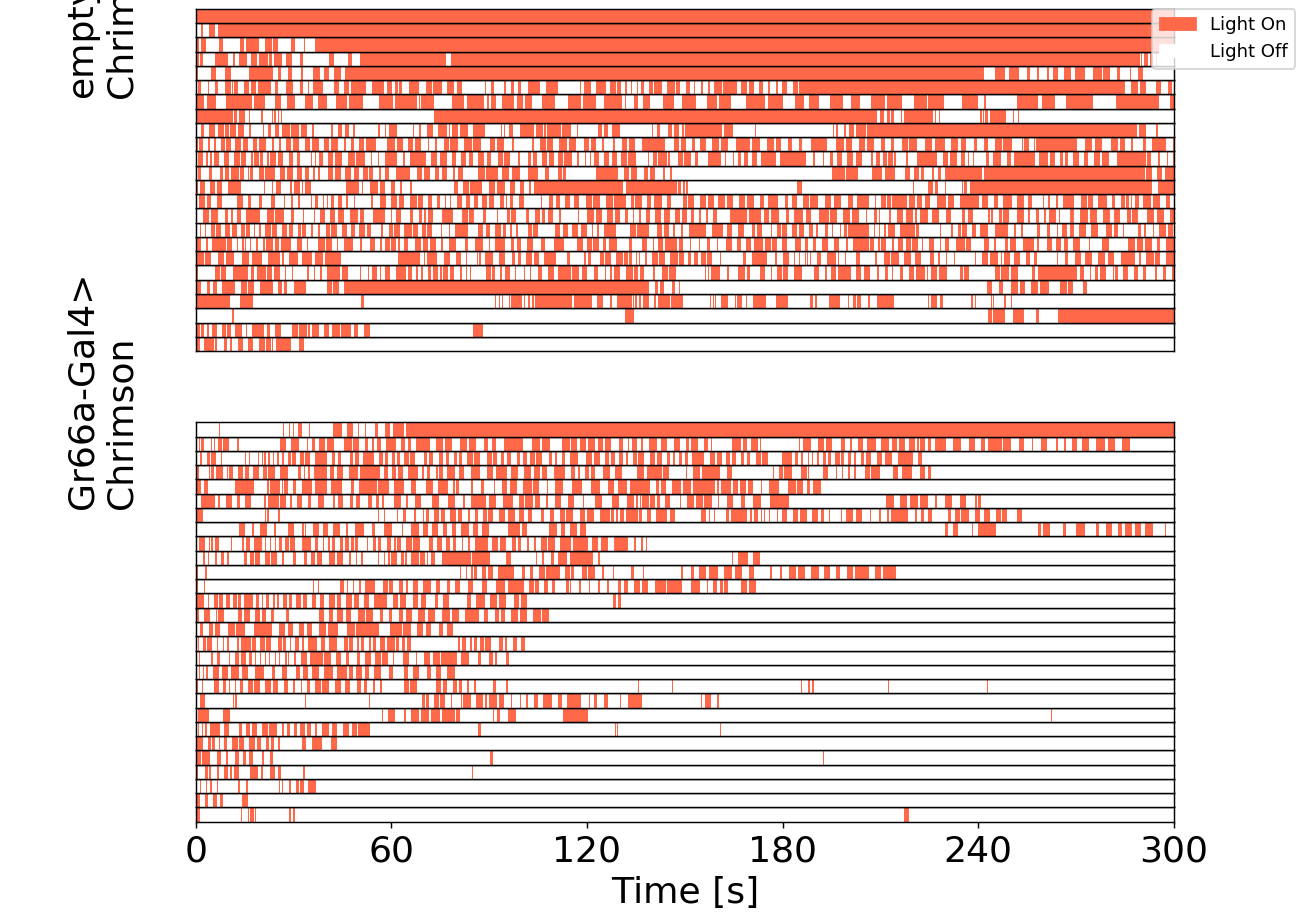

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [31]:
fps=30 # this is not elegant but true in this case
def frame_to_time(x, pos):
    """
    The two args are the value and tick position
    The first string defines what is shown. %1.1f means that only the first decimal is shown
    x/fps means that for each 'tick', meaning each datapoint the value that is shown is divided by the frames per second.
    This way the actual seconds are displayed
    """
    # CAREFUL!!! was '%1.1f', the 0 makes sure only the value before the decimal dot is shown!!!
    # Make sure your ticks are really integers! 
    return '%1.0f' % (x/fps) # 
# x axis step size for ticks
xtick_size=60

axprops = dict(xticks=[], yticks=[])
# define the gr66a barprops
barprops_gr66a = dict(aspect='auto', cmap=own_red_cmap, interpolation='nearest')
# define the empty-Gal4 barprops
barprops_empty = dict(aspect='auto', cmap=own_red_cmap, interpolation='nearest')

fig = plt.figure(figsize=(10,7))
# some constants
start_at_y_coordinate = 0.1
# height of each plot
# space is a parameter allowing for space between the genotypes
space = 5
height_of_plot = (1/(sorted_gr66a.shape[1]+sorted_empty.shape[1]+space)) - \
    (start_at_y_coordinate*(1/(sorted_gr66a.shape[1]+sorted_empty.shape[1])))
x_position_start = 0.15
x_length = 0.9-x_position_start # up to 1 - but 1 doesn't close the right side of the plot

# need a counter that runs independent of the i as we need to start at 0 once the first numpy array (gr66a)
# has been plotted
counter = 0
empty_plot_counter = 0
for i in range(sorted_gr66a.shape[1]+preference_index_over_time_empty.shape[1]+space):
    if i == 0:
        # create an axes at on top of the previous axis
        ax = fig.add_axes([x_position_start,# x position
                            (height_of_plot*i)+start_at_y_coordinate, # y position
                            x_length, # x length
                            height_of_plot # y length (or height)
                          ]) 
        # and plot the sorted Gr66a data
        ax.imshow(sorted_gr66a[:,i].reshape((1, -1)), **barprops_gr66a)
        
        # set x axis limit - make sure to have a multiple of the framerate to make sure the ticks are placed in proper distance!
        start_x_tick, end_x_tick = 0, sorted_gr66a.shape[0]
        ax.set_xlim(start_x_tick, end_x_tick)
        # get one tick for every 60 seconds
        stepsize = int(fps*xtick_size)
        # set the xticks
        ax.xaxis.set_ticks(np.arange(start_x_tick, end_x_tick+fps, stepsize))
        # label the xticks with the seconds by first defining a function...
        x_formatter = plticker.FuncFormatter(frame_to_time)
        # and then giving this function to the major_formatter
        ax.xaxis.set_major_formatter(x_formatter)
        # label the x axis
        ax.set_xlabel('Time [s]', fontsize=20)
        # can change ticklabel size here
        ax.tick_params(axis='x', labelsize=20)
        
        # turn off y axis
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            left=False,         # ticks along the left edge are off
            labelleft=False) # labels along the left edge are off
        
    # if still looking at data of Gr66a
    elif i < sorted_gr66a.shape[1]:
        # create an axes at on top of the previous axis
        ax = fig.add_axes([x_position_start,# x position
                            (height_of_plot*i)+start_at_y_coordinate, # y position
                            x_length, # x length
                            height_of_plot  # y length (or height)
                          ],
                           **axprops)
        # and plot the sorted Gr66a data
        ax.imshow(sorted_gr66a[:,i].reshape((1, -1)), **barprops_gr66a)
    # if Gr66a data plotting finished go to second part of the figure: plot the empty-Gal4 data
    elif empty_plot_counter != space:
        #counter +=1
        empty_plot_counter += 1 
    else:
        # create an axis on top of the gr66a plots AND the already plotted empty-Gal4 data
        ax = fig.add_axes([x_position_start,# x position
                        (height_of_plot*i) + start_at_y_coordinate, # y position
                        x_length, # x length
                        height_of_plot # y length (or height)
                          ], **axprops) 
        # and plot the sorted empty-Gal4 data
        ax.imshow(sorted_empty[:,counter].reshape((1, -1)), **barprops_empty)
        counter +=1

# add the custom colormap!
used_colormap = own_red_cmap(np.linspace(0, 1, 2))    
red_patch = mpatches.Patch(color=used_colormap[1,:], label='Light On')
white_patch = mpatches.Patch(color=used_colormap[0,:], label='Light Off')
fig.legend(handles=[red_patch, white_patch])

# add labels indicating Genotype
fig.text(0.05, 0.45, 'Gr66a-Gal4>\nChrimson', rotation=90, fontsize=20)
fig.text(0.05, 0.9, 'empty-Gal4>\nChrimson', rotation=90, fontsize=20)
fig.savefig(Path(str(target_path), 'Fig3d.eps'))